In [1]:
# !pip install wordcloud
# !pip install multidict

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [7]:
# Create wordcloud image for every words
fields = ['word',"total"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

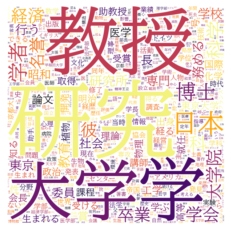

In [8]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='inferno')

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_all.png")


In [9]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [10]:
# create wc for noun(名詞)
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,研究,62473,17011
1,教授,49488,18099
2,学,46580,14842
3,大学,45604,15050
4,日本,40098,16587


In [11]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56691 entries, 0 to 62453
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      56691 non-null  object
 1   total     56691 non-null  int64 
 2   articles  56691 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [13]:
noun_dict = noun2.set_index("word").to_dict()['total']

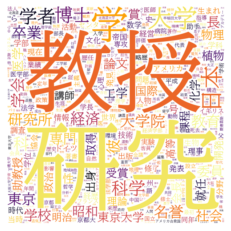

In [14]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='inferno')

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_noun.png")


In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [16]:
# verb (動詞)
##CHANGE FILE NAME!!
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
16,務める,13269,7981
19,行う,12212,6180
36,生まれる,7858,7114
44,学ぶ,7117,4944
46,経る,7072,5738


In [17]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5173 entries, 16 to 62448
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      5173 non-null   object
 1   total     5173 non-null   int64 
 2   articles  5173 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 161.7+ KB


In [18]:
verb_dict = verb2.set_index("word").to_dict()['total']

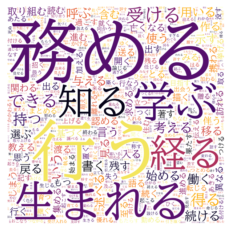

In [19]:
wc = WordCloud(background_color="white", \
               max_words=1500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='inferno')

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_verb.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [21]:
# adj (形容詞)
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
80,ない,5083,2408
253,多い,1990,1407
305,高い,1658,1218
349,新しい,1488,1063
378,大きい,1421,1026


In [23]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 80 to 62433
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      590 non-null    object
 1   total     590 non-null    int64 
 2   articles  590 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.4+ KB


In [25]:
adj_dict = adj2.set_index("word").to_dict()['total']

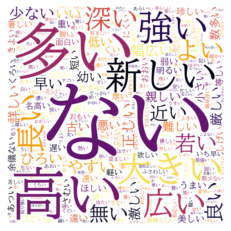

In [26]:
wc = WordCloud(background_color="white", \
               max_words=300, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='inferno')

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_adj.png")

In [29]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)